### 1. Introduction

- The Olympic games are an athletic festival that originated in ancient Greece and revived in late 19th century.
- The modern Olympics comprises all the games from Athens 1986 till date.
- This dataset sheds the light on history of olympics, which are all the countries involved, who has won more medals, women empowerment etc.

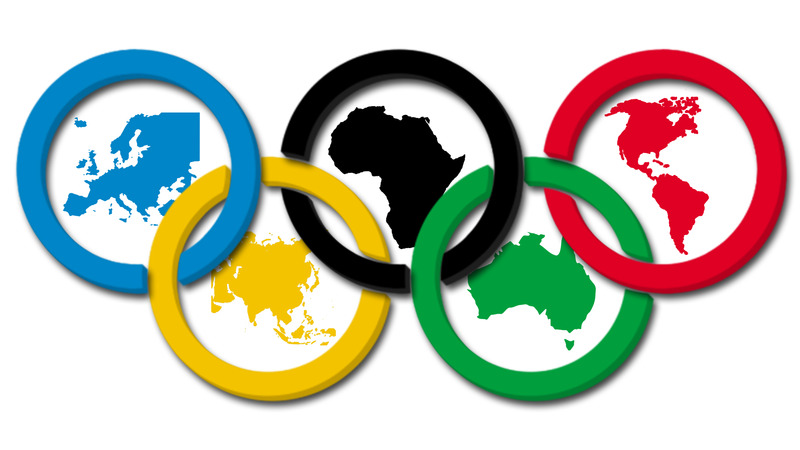


### 2. Problem Statement

This notebook provides the data analysis for Summer Olympics games dataset and figure out interesting statistics and insights about Olympics games being held till year 2012. Objective is to:

- know the results of Olympics for 120 years.
- understand the trends of the Olympic games results.
- answer some of the common questions about the dataset.

##### Olympics Games EDA
Understand the data by EDA and derive simple models with Pandas as baseline. EDA is a critical and first step in analyzing the data and we do this for below reasons :
- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes

### 3. Importing essential libraries

In [1]:
import pandas as pd                                               # Importing for panel data analysis
import numpy as np                                                # Importing package numpys (For Numerical Python)
import pandas_profiling                                           # Importing Pandas Profiling (To generate Univariate Analysis)
import matplotlib.pyplot as plt                                   # Importing pyplot interface of matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
from pandasql import sqldf                                        # Importing sql package to use queries 
%matplotlib inline

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

c:\users\shant\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 4. Data Acquisition & Description

- This dataset consists of information about Country, Year, Event, Discipline and Medals won by athletes in different Olympics games.
- It contains information about 147 distinct countries in 666 distinct events in the Olympics Games history.


| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 31165 | 9 | 2.48 MB |


|#|Feature	|Feature Descrption|
|-|----------:|-----------------:|
|1|Year	    |Year on which olympics conducted|
|2|City	    |City Where the Olympics games held on|
|3|Sport	    |Sport in Olympics e.g Swimming|
|4|Discipline	|Discipline of game under Sport like Swimming in Aquatics|
|5|Athlete	|Name of the Athlete|  
|6|Country	|Name of the Country e.g IND for India, athlete belongs to|
|7|Gender	    |Gender of the Athlete, men/women| 
|8|Event	    |Event of the Sport e.g 100M race|
|9|Medal	    |Medal won by Athlete (Gold, Silver, Bronze)|



In [2]:
olympics_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")
print('Shape of the dataset:', olympics_data.shape)

Shape of the dataset: (31165, 9)


This dataset has 31165 entries(rows) across 9 columns

In [3]:
 olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


head() function returns the first 5 records(5 rows)

In [4]:
 olympics_data.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


tail() function returns the last 5 records(5 rows)

In [5]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


- info() function returns the information of columns (null or non-null) and data types of corresponding columns.
- From the above information, we can conclude that there are no null values.
- Country column has 4 values missing.
- Except year (which is int data type - continuous), all other columns are object(categorical in nature) data type.

In [6]:
olympics_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

- The above function checks the number of null values in a dataset filtered by columns.
- From the above data, it is found that country has 4 values as null

### 4.1 Description

In [7]:
olympics_data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


describe() function is used to find out the outliers, max, min, average, IQR value etc

### 5. Data Pre-Profiling

#### Generating Pandas Pre-profiling, an interactive HTML Report using Pre-profiling feature to describe the Olympics dataset and visual representation of some of their columns

In [8]:
profile = pandas_profiling.ProfileReport(olympics_data)
profile.to_file(output_file="OlympicsDataset_before_datacleaning.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.14it/s]


In this step we have to check if there are any issues such as
 - outliers 
 - duplicates
 - misssing values
 - inconstancy in dtypes
 - typos
 - format

In [9]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [10]:
olympics_data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [11]:
olympics_data.duplicated().sum()

2

From the above information we can get to a testimony that there are 2 issues exist in the dataset
- Country has 4 null values
- dataset has 2 duplicate rows

### 6. Data Cleaning

Steps to rectify above issues

- drop or replace null values
- drop duplicate values

In [12]:
#SQL Query to find out the missing values
query = "SELECT * FROM olympics_data WHERE Country is NULL"
sqldf(query, globals())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2012,London,Athletics,Athletics,Pending,None,Women,1500M,Gold
1,2012,London,Weightlifting,Weightlifting,Pending,None,Women,63KG,Gold
2,2012,London,Weightlifting,Weightlifting,Pending,None,Men,94KG,Silver
3,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",None,Men,Wf 60 KG,Silver


From the above details, it is found that 4 values in Country column has null. We can replace null values with mode since it is categorical variable

In [13]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [14]:
olympics_data['Country'] = olympics_data['Country'].fillna(olympics_data['Country'].mode()[0])

In [15]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


So now, Country column which had null values are replaced by mode.

In [16]:
query_1 = "SELECT * FROM olympics_data WHERE Athlete = 'Pending'"
sqldf(query_1, globals())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2012,London,Athletics,Athletics,Pending,USA,Women,1500M,Gold
1,2012,London,Weightlifting,Weightlifting,Pending,USA,Women,63KG,Gold
2,2012,London,Weightlifting,Weightlifting,Pending,USA,Men,94KG,Silver


We can see from above data that, 3 Athlete values are Pending, so will remove these 3 records 

Let's replace the Pending values with nan and then we can drop the null values

In [17]:
olympics_data.replace({'Athlete':'Pending'},np.nan,inplace=True)

In [18]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [19]:
query_2 = "SELECT * FROM olympics_data WHERE Athlete = 'Pending'"
sqldf(query_2, globals())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


So above details indicate that there are no Pending values

In [20]:
query_3 = "SELECT * FROM olympics_data WHERE Athlete is NULL"
sqldf(query_3, globals())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2012,London,Athletics,Athletics,None,USA,Women,1500M,Gold
1,2012,London,Weightlifting,Weightlifting,None,USA,Women,63KG,Gold
2,2012,London,Weightlifting,Weightlifting,None,USA,Men,94KG,Silver


Pending values are successfully replaced with null

Now, we will drop the rows which have null values

In [21]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [22]:
olympics_data.dropna(inplace=True)

In [23]:
query_4 = "SELECT * FROM olympics_data WHERE Athlete is NULL"
sqldf(query_4, globals())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


Rows with null values are successfully removed from the dataset

In [24]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [25]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31162 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31162 non-null  int64 
 1   City        31162 non-null  object
 2   Sport       31162 non-null  object
 3   Discipline  31162 non-null  object
 4   Athlete     31162 non-null  object
 5   Country     31162 non-null  object
 6   Gender      31162 non-null  object
 7   Event       31162 non-null  object
 8   Medal       31162 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [26]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


- Country which had 4 null values have been rectified: 3 records have been removed and 1 record is replaced with mode.
- Since 3 records have been removed, the row number is reduced to 31162 from 31165.

In [27]:
olympics_data.duplicated().sum()

2

Let's remove the duplicate rows

In [28]:
olympics_data.drop_duplicates(inplace=True)        # This will remove the duplicate rows from dataset

In [29]:
olympics_data.duplicated().sum()

0

Duplicate rows have been successfully removed from the original dataset

In [30]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [31]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31160 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31160 non-null  int64 
 1   City        31160 non-null  object
 2   Sport       31160 non-null  object
 3   Discipline  31160 non-null  object
 4   Athlete     31160 non-null  object
 5   Country     31160 non-null  object
 6   Gender      31160 non-null  object
 7   Event       31160 non-null  object
 8   Medal       31160 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [32]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [33]:
olympics_data.reset_index(drop=True, inplace=True)    # This method asks the pandas to drop the index from 
                                                      # considering it as variable before the profile reporting 

In [34]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [35]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31160 entries, 0 to 31159
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31160 non-null  int64 
 1   City        31160 non-null  object
 2   Sport       31160 non-null  object
 3   Discipline  31160 non-null  object
 4   Athlete     31160 non-null  object
 5   Country     31160 non-null  object
 6   Gender      31160 non-null  object
 7   Event       31160 non-null  object
 8   Medal       31160 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Now, the data cleaning is completed. The following cleaning has been done

- Country column had 4 values missing, out of which 3 are removed (since there are no Athelete values for 3 records)  and 1 is replaced with mode.
- 2 Duplicate rows were present, which now have been dropped from the original dataset.

### 7. Data Post-Profiling

- In this section, we will observe the changes after performing data pre-processing, if present.

In [36]:
profile = pandas_profiling.ProfileReport(olympics_data)
profile.to_file(output_file="OlympicsDataset_after_datacleaning.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.99it/s]


**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.


### 8. Exploratory Data Analysis

 Exploratory Data Analysis is the process in which the relevant questions are asked and accurate information with visualisation is obtained.
 

**Question 1 : Which country has secured most/least medals in the history of olympics?**

In [37]:
olympics_data.Country.unique()        # Finds the distinct countries

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

In [38]:
olympics_data.Country.nunique()         # Finds the number of distinct countries

147

In [39]:
olympics_data.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

In [40]:
olympics_data.Year.nunique()

27

In [41]:
olympics_data.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [42]:
olympics_data.City.nunique()

22

In [43]:
olympics_data.Sport.unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

In [44]:
olympics_data.Sport.nunique()

43

In [45]:
olympics_data.Discipline.unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [46]:
olympics_data.Discipline.nunique()

67

In [47]:
olympics_data.Athlete.unique()

array(['HAJOS, Alfred', 'HERSCHMANN, Otto', 'DRIVAS, Dimitrios', ...,
       'TOTROV, Rustam', 'ALEKSANYAN, Artur', 'LIDBERG, Jimmy'],
      dtype=object)

In [48]:
olympics_data.Athlete.nunique()

22761

In [49]:
olympics_data.Gender.unique()

array(['Men', 'Women'], dtype=object)

In [50]:
olympics_data.Event.unique()

array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Doubles', 'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chap

In [51]:
olympics_data.Event.nunique()

666

In [52]:
olympics_data.Medal.unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [109]:
Max_Medals_Countries = olympics_data.groupby("Country")["Medal"].count().sort_values(ascending=False).reset_index()
Top_Countries = Max_Medals_Countries.head(5)

print(Top_Countries)

  Country  Medal
0     USA   4586
1     URS   2049
2     GBR   1720
3     FRA   1396
4     GER   1305


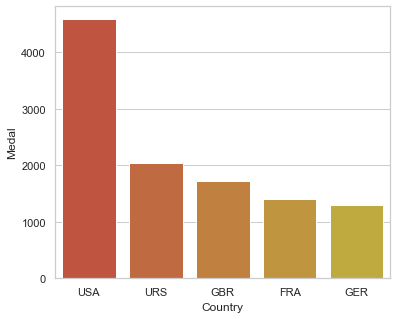

In [135]:
fig = plt.figure(figsize=(6,5))
#fig.add_subplot(111)
sns.barplot(x = "Country", y = "Medal", data=Top_Countries, palette = 'autumn', saturation=.50)
plt.show()

In [128]:
Min_Medals_Countries = olympics_data.groupby("Country")["Medal"].count().sort_values(ascending=False).reset_index()
Bottom_Countries = Max_Medals_Countries.tail(25)

print(Bottom_Countries)

    Country  Medal
122     TAN      2
123     CIV      1
124     DJI      1
125     CYP      1
126     BER      1
127     BRN      1
128     BOT      1
129     ERI      1
130     BDI      1
131     BAR      1
132     UAE      1
133     SEN      1
134     GAB      1
135     GRN      1
136     GUA      1
137     TOG      1
138     IRQ      1
139     TGA      1
140     ISV      1
141     AHO      1
142     MKD      1
143     SUD      1
144     MRI      1
145     NIG      1
146     GUY      1


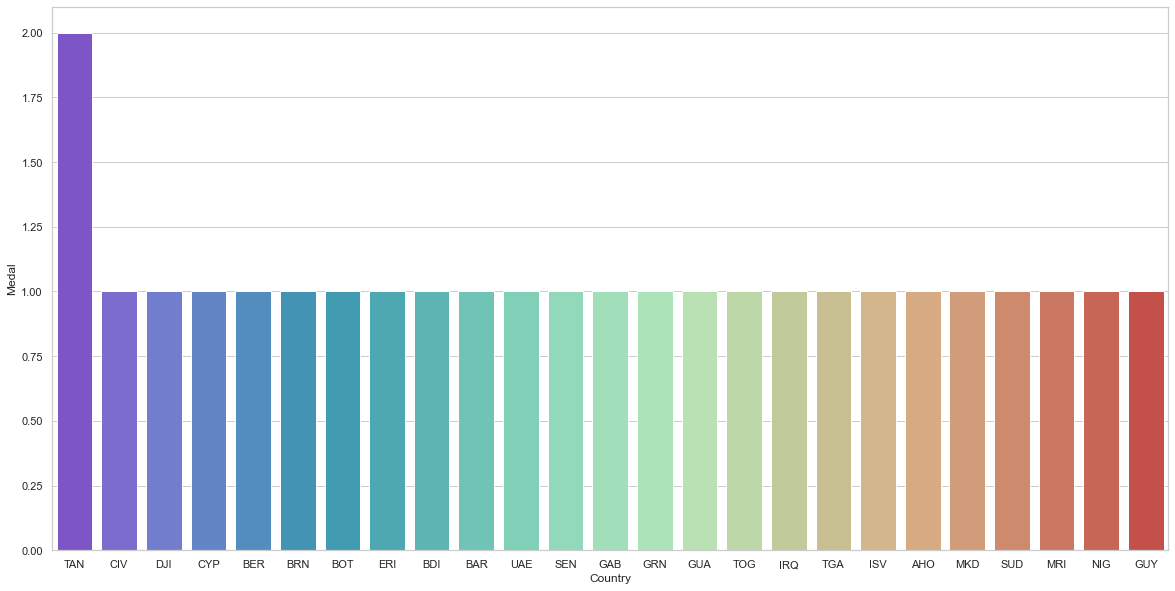

In [129]:
fig = plt.figure(figsize=(20,10))
#fig.add_subplot(111)
sns.barplot(x = "Country", y = "Medal", data=Bottom_Countries, palette = 'rainbow', saturation=.50)
plt.show()

Above info indicates 
- **USA** has secured most number of medals(4586).
- **24** countries viz. **BRN, GUA, BOT, TOG, MRI, CYP, SUD, GRN, ISV, UAE, ERI, MKD, BAR, AHO, IRQ, NIG, BER, TGA, GUY, CIV, BDI, SEN, DJI, GAB** have secured the least number of medals(1).

**Question 2: India's performance over the years**

In [55]:
# In which year India won first medal in Olympics?

#India_First = olympics_data[(olympics_data['Country']=='IND')&(olympics_data['Year'] == 1896)]
Indian_First_Medal = olympics_data[olympics_data['Country']=='IND']
Indian_First_Medal.head(1)                          

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver


- So, this shows that India won it's first medal on **1900**
- **Norman Pritchard** is the athlete who secured first medal for **India** in **Athletics**

In [56]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [57]:
# In which event India won first gold medal in Olympics?

Indian_First_Gold_Medal = olympics_data[(olympics_data['Country']=='IND')&(olympics_data['Medal'] == 'Gold')]
Indian_First_Gold_Medal.reset_index(drop=True, inplace=True)
print(Indian_First_Gold_Medal.Event.head(1))

0    Hockey
Name: Event, dtype: object


In [58]:
# Total number of Medals won by India across years

India_medals = olympics_data[olympics_data['Country']=='IND']
India_medals.Medal.count()

183

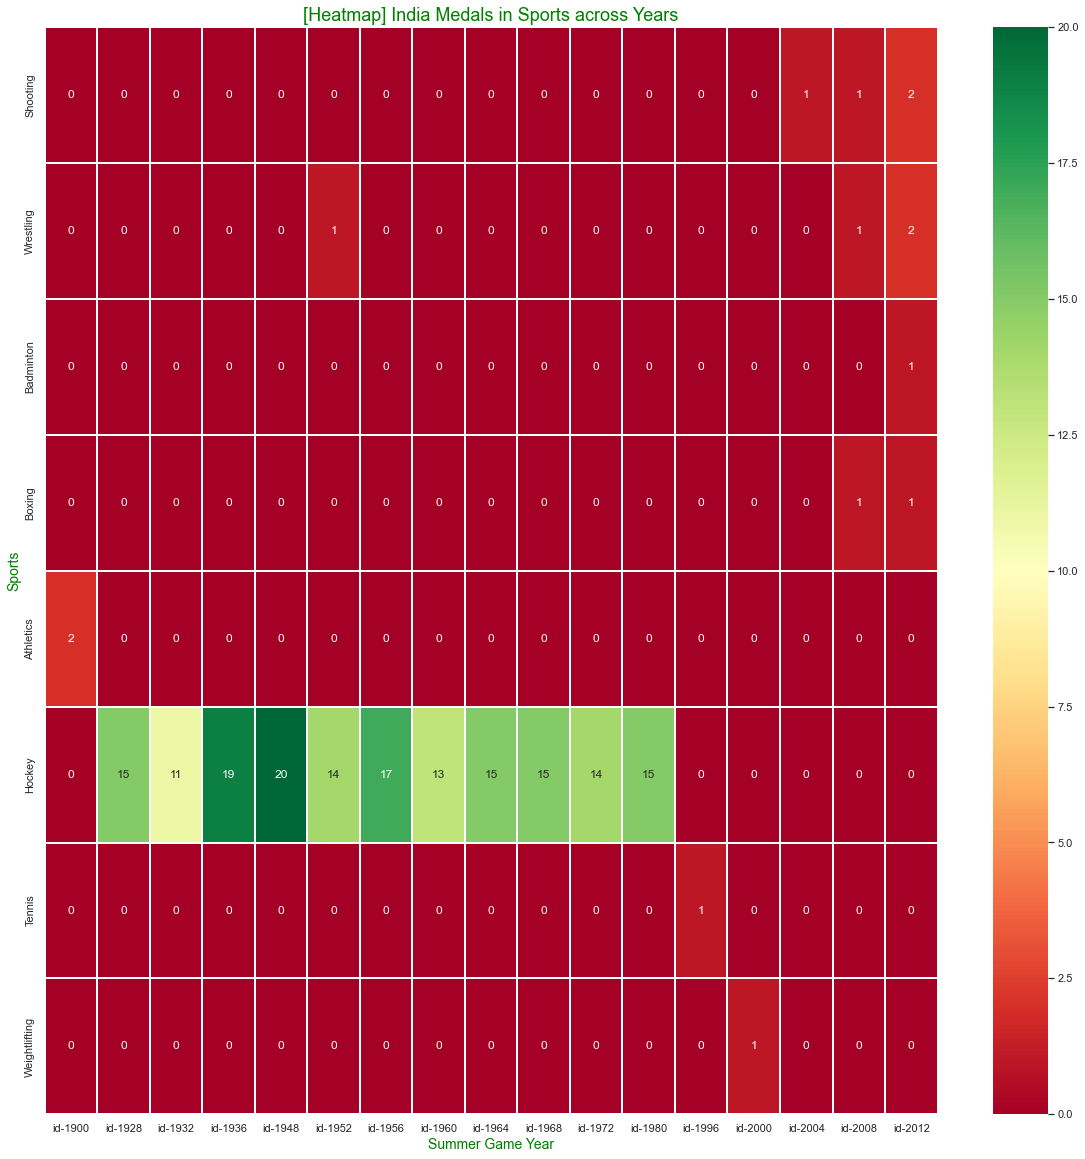

In [136]:
#Adding id to the dataset, for analysis 
olympics_data['id'] = range(0, len(olympics_data))

Ind_Medals = olympics_data[(olympics_data['Country'].isin(['IND'])) & (olympics_data['Medal']!='No Medal')]
Ind_Medals = pd.pivot_table(Ind_Medals, index=['Sport'], columns=['Year'], values = ['id'], aggfunc=len, fill_value=0)
Ind_Medals = Ind_Medals.reindex(Ind_Medals['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(Ind_Medals, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] India Medals in Sports across Years', size=18, color="green")
plt.show()

**Question 3: How many times Olympics games hosted till date and which country hosted the maximum Olympics games?**

In [59]:
print("Number of times the Olympics has been hosted since 1896 : ",len(pd.unique(olympics_data["Year"])))
print("Number of Distinct cities hosted the games ",olympics_data["City"].nunique())

Number of times the Olympics has been hosted since 1896 :  27
Number of Distinct cities hosted the games  22


**Question 4. Since 1896, what is the number of Sports held per year in Summer Olympics?**


In [60]:
olympic_sports = olympics_data.groupby("Year")["Sport"].nunique().sort_values().reset_index()
print(olympic_sports)


    Year  Sport
0   1896      9
1   1912     14
2   1932     14
3   1928     14
4   1904     16
5   1956     17
6   1952     17
7   1948     17
8   1960     17
9   1924     17
10  1968     18
11  1936     19
12  1900     19
13  1964     19
14  1984     21
15  1980     21
16  1976     21
17  1972     21
18  1908     22
19  1920     22
20  1988     23
21  1992     25
22  1996     26
23  2012     26
24  2008     28
25  2000     28
26  2004     28


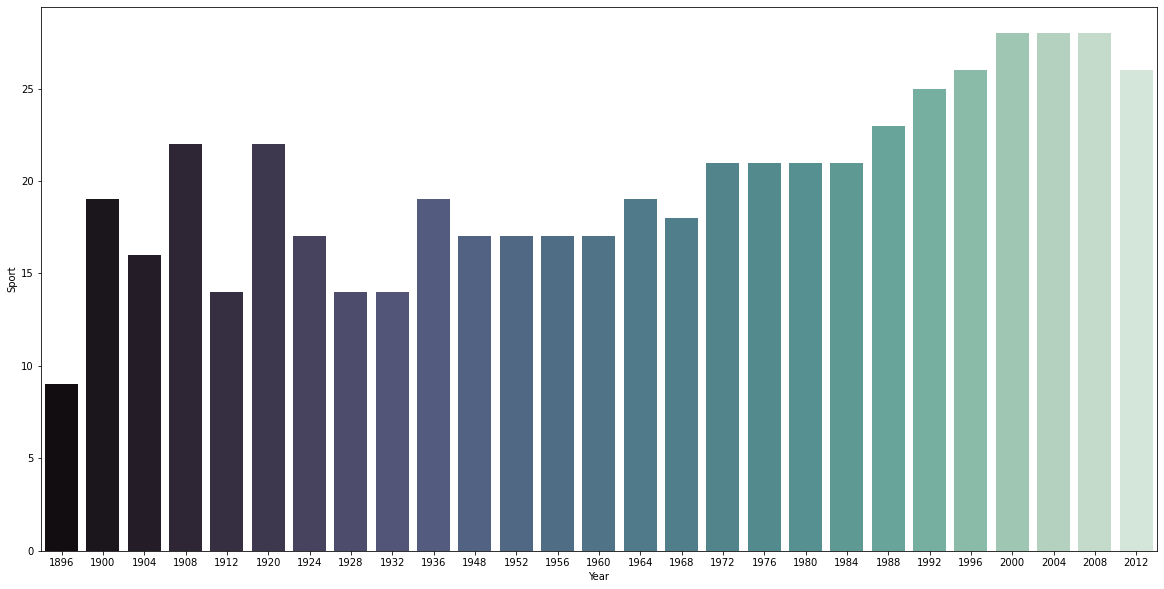

In [61]:
fig = plt.figure(figsize=(20,10))
#fig.add_subplot(111)
sns.barplot(x = "Year", y = "Sport", data=olympic_sports, palette = 'mako',saturation=.50)
plt.show()

**Question 5: Which cities hosted the Olympics more than once?**

In [62]:
#Which cities have hosted Olympics till date in the dataset.
olympics_data.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [63]:
#Number of cities have hosted Olympics till date in the dataset.
olympics_data.City.nunique()

22

In [64]:
#Which City hosted the Olympics maximum number of times ?

print(olympics_data.loc[:, ['Year', 'City']].drop_duplicates()['City'].value_counts().sort_values(ascending=False).head(1))



London    3
Name: City, dtype: int64


In [65]:
#Which Cities has hosted the Olympics more than Once
host_City = olympics_data.loc[:, ['Year', 'City']].drop_duplicates()["City"].value_counts(ascending=False).rename_axis('City').to_frame('Count')
host_City = host_City[host_City["Count"]>1].reset_index()
host_City


,City,Count
0,London,3
1,Athens,2
2,Los Angeles,2
3,Paris,2


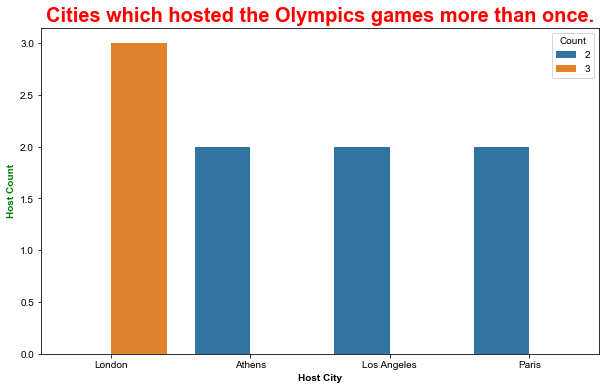

In [66]:
fig = plt.figure(figsize=(10, 6))

ax=sns.barplot(x='City', y='Count', hue = 'Count', data=host_City)
ax.set(xlabel='Host City', ylabel='Host Count')
sns.set_theme(style = 'whitegrid')

#Setting axis
plt.xlabel('Host City', fontweight = 'bold', color = 'Black')
plt.ylabel('Host Count', fontweight = 'bold', color = 'Green')


plt.title("Cities which hosted the Olympics games more than once.", fontweight = 'bold', color = 'Red', size = 20)
fig.savefig("HostCity.png", dpi=fig.dpi)


**Question 6: How the level of participation has changed over the years**


In [67]:
#How many countries participated in each Olympics?
olympics_data.groupby('Year').nunique()[['Country']]


,Country
Year,
1896,11
1900,20
1904,10
1908,19
1912,18
1920,22
1924,27
1928,32
1932,27


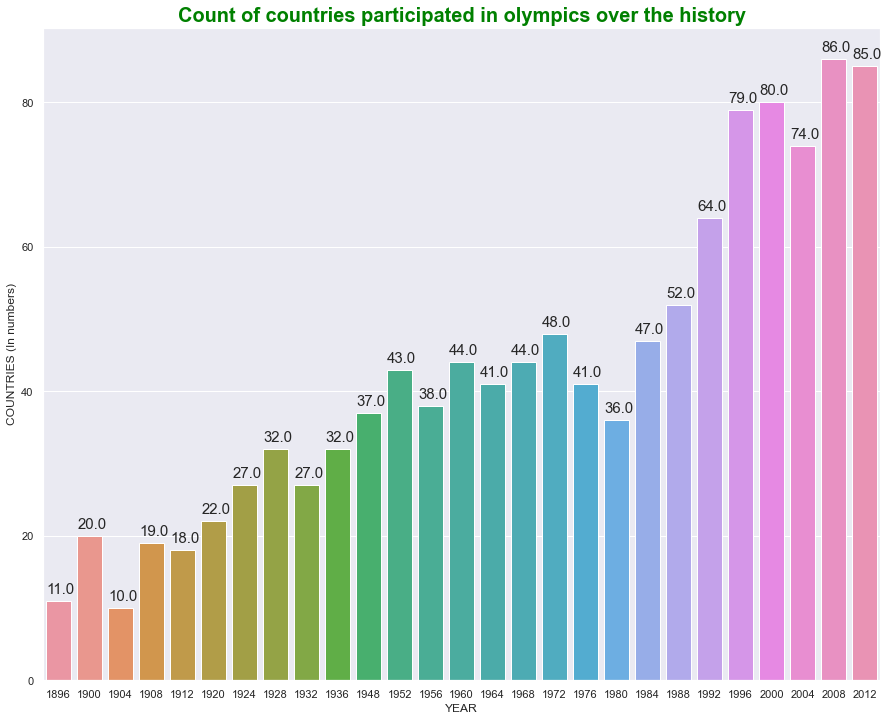

In [68]:
data_group = olympics_data.groupby('Year').nunique()[['Country']].reset_index()
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.barplot(x='Year',y='Country', data=data_group)
plt.xlabel("YEAR")
plt.ylabel("COUNTRIES (In numbers)")
plt.title("Count of countries participated in olympics over the history", fontweight = 'bold', color = 'Green', size = 20)
plt.savefig("CountryParticipated.png",dpi=fig.dpi)

#Displaying values on bar
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+1),fontsize=15)

**Question 7: What is the pattern of medals won per year?**

In [69]:
#Number of medals won in Olympics till date ? year wise?

numMedals = olympics_data.groupby('Year').count()[['Medal']].reset_index()
print("Total Medals won year wise \n",numMedals)

Medals_Year_wise = olympics_data.count()[['Medal']]
print("Total number of medals won in Olympics till date ", Medals_Year_wise)

Total Medals won year wise 
     Year  Medal
0   1896    151
1   1900    512
2   1904    470
3   1908    804
4   1912    885
5   1920   1298
6   1924    884
7   1928    710
8   1932    615
9   1936    875
10  1948    814
11  1952    889
12  1956    885
13  1960    882
14  1964   1010
15  1968   1031
16  1972   1185
17  1976   1305
18  1980   1386
19  1984   1459
20  1988   1546
21  1992   1705
22  1996   1859
23  2000   2015
24  2004   1998
25  2008   2042
26  2012   1945
Total number of medals won in Olympics till date  Medal    31160
dtype: int64


In [70]:
gold_count = olympics_data[olympics_data['Medal']=='Gold']
gold_count.Medal.count()

10482

In [71]:
silver_count = olympics_data[olympics_data['Medal']=='Silver']
silver_count.Medal.count()

10309

In [72]:
bronze_count = olympics_data[olympics_data['Medal']=='Bronze']
bronze_count.Medal.count()

10369

In [73]:
total_medals = gold_count.Medal.count() + silver_count.Medal.count() + bronze_count.Medal.count()
print(total_medals)

31160


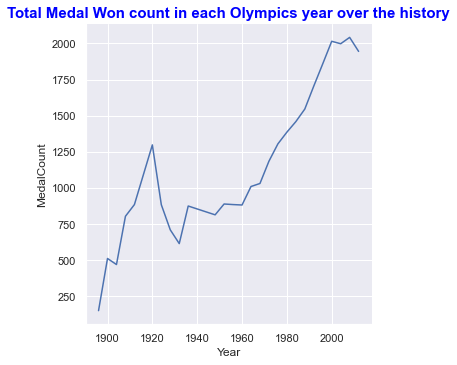

In [74]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.relplot(x='Year',y='Medal',data=numMedals,kind='line')#.set_xticklabels(numMedals.Year,rotation=90)
plt.xlabel("Year")
plt.ylabel("MedalCount")
plt.title("Total Medal Won count in each Olympics year over the history", fontweight = 'bold', color = 'Blue', size = 15)
plt.savefig("TotalMedalCount.png")

**Question 8: How is the gender participation in Summer Olympics, since 1896?**

In [75]:
#Number of Mens and Womens victory count

men_count = olympics_data[olympics_data['Gender']=='Men']
print('Count of Mens who won in olympics: ', men_count.Gender.count())

women_count = olympics_data[olympics_data['Gender']=='Women']
print('Count of Womens who won in olympics: ', women_count.Gender.count())


Count of Mens who won in olympics:  22744
Count of Womens who won in olympics:  8416


    Year Gender  Count
0   1896    Men    151
1   1900    Men    501
2   1900  Women     11
3   1904    Men    458
4   1904  Women     12
5   1908    Men    789
6   1908  Women     15
7   1912    Men    855
8   1912  Women     30
9   1920    Men   1255
10  1920  Women     43
11  1924    Men    833
12  1924  Women     51
13  1928    Men    615
14  1928  Women     95
15  1932    Men    555
16  1932  Women     60
17  1936    Men    791
18  1936  Women     84
19  1948    Men    718
20  1948  Women     96
21  1952    Men    750
22  1952  Women    139
23  1956    Men    739
24  1956  Women    146
25  1960    Men    737
26  1960  Women    145
27  1964    Men    820
28  1964  Women    190
29  1968    Men    819
30  1968  Women    212
31  1972    Men    947
32  1972  Women    238
33  1976    Men    924
34  1976  Women    381
35  1980    Men    957
36  1980  Women    429
37  1984    Men    973
38  1984  Women    486
39  1988    Men   1011
40  1988  Women    535
41  1992    Men   1105
42  1992  W

<AxesSubplot:xlabel='Year', ylabel='Count'>

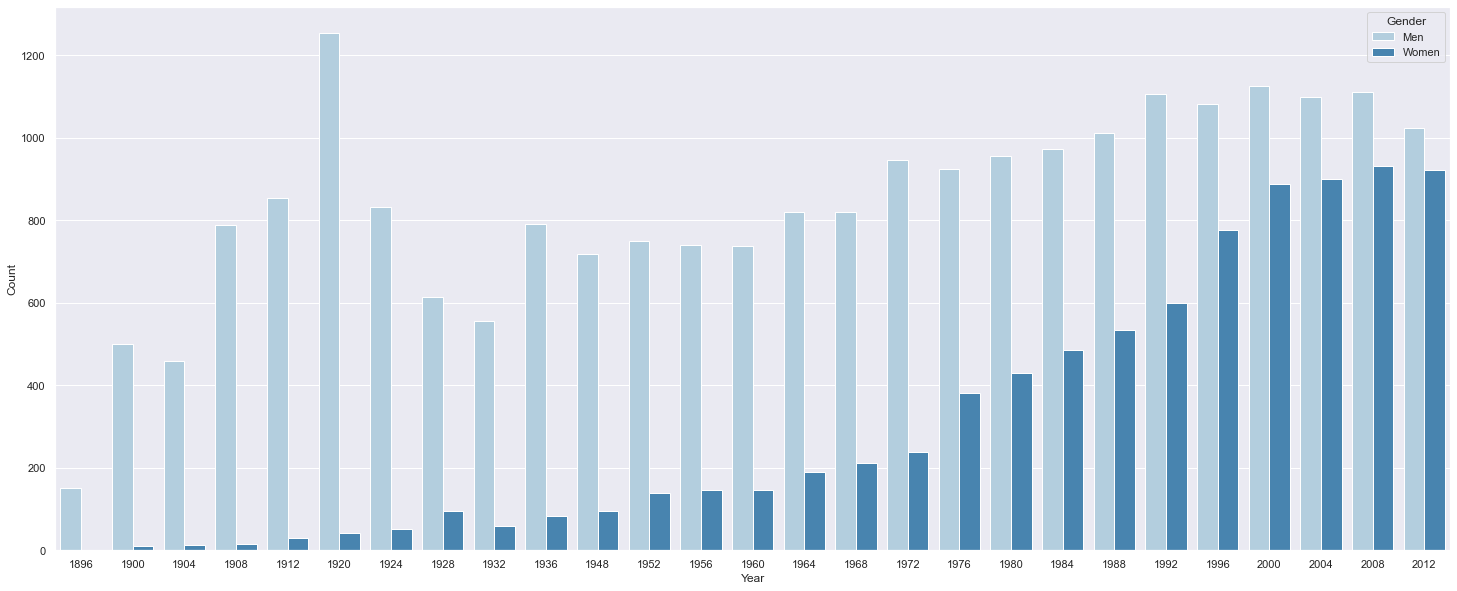

In [76]:
#Now that we have looked the events across the years, let us look at the gender participation in these events
df_sports = olympics_data.groupby(["Year","Gender"])["Sport"].count().reset_index().rename(columns={"Sport":"Count"})
print(df_sports)
plt.figure(figsize=(25,10))
sns.barplot(x = "Year", y = "Count", hue = "Gender", data = df_sports, palette = "Blues" )

**Question 9: Top 10 successful athletes in the history of olympics**

In [78]:
top_medalists = olympics_data[olympics_data['Medal'] == 'Gold']
top_medalists.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete           Medal
PHELPS, Michael   Gold     18
LATYNINA, Larisa  Gold      9
SPITZ, Mark       Gold      9
NURMI, Paavo      Gold      9
LEWIS, Carl       Gold      9
KATO, Sawao       Gold      8
THOMPSON, Jenny   Gold      8
FISCHER, Birgit   Gold      8
BIONDI, Matthew   Gold      8
EWRY, Ray         Gold      8
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Top 10 successful athletes')

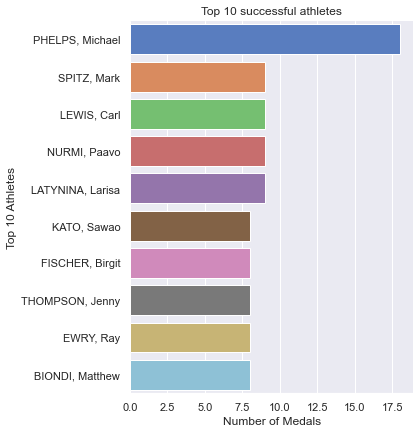

In [79]:
totalMenGoldMedalAthlete = olympics_data[(olympics_data['Medal'] == 'Gold')]['Athlete'].value_counts().reset_index(name='Athlete').head(10)
g = sns.catplot(y="index", x="Athlete", data=totalMenGoldMedalAthlete,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Athletes")
plt.title('Top 10 successful athletes')

**Question 10: Top 10 countries to win most Gold medals across all seasons collectively**

In [80]:
olympics_data[(olympics_data['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2235
1,URS,838
2,GBR,546
3,ITA,476
4,GER,452
5,HUN,412
6,FRA,408
7,SWE,349
8,GDR,329
9,AUS,312


Text(0.5, 1.0, 'Medals per Country')

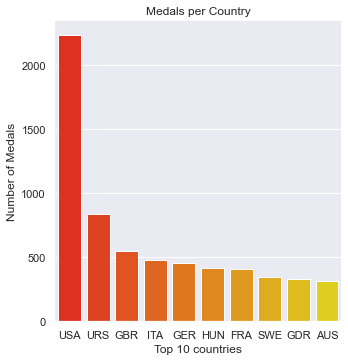

In [81]:
totalGoldMedals = olympics_data[(olympics_data['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=5, kind="bar", palette="autumn")
g.despine(left=True)
#sns.set_theme(style = 'whitegrid')
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

**Question 11: Number of events in each sport over years**

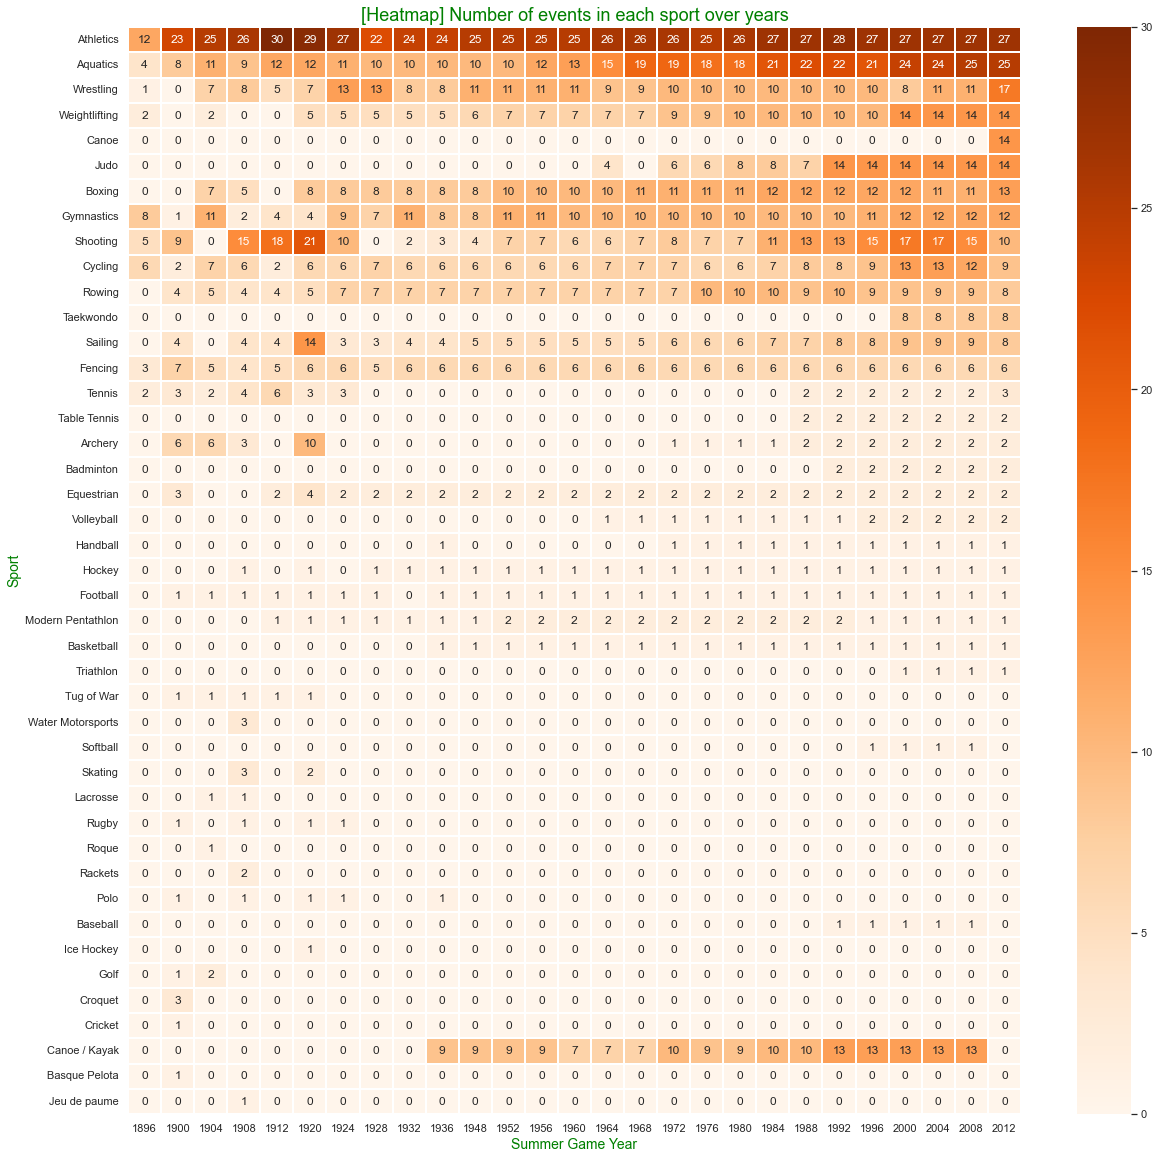

In [82]:
sport_year = olympics_data.pivot_table(olympics_data, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2012, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="Oranges")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()

**Athletics** and **Aquatics** are the sports which has the maximum number of events

**Question 12: Men Vs Women participation in olympics across years**

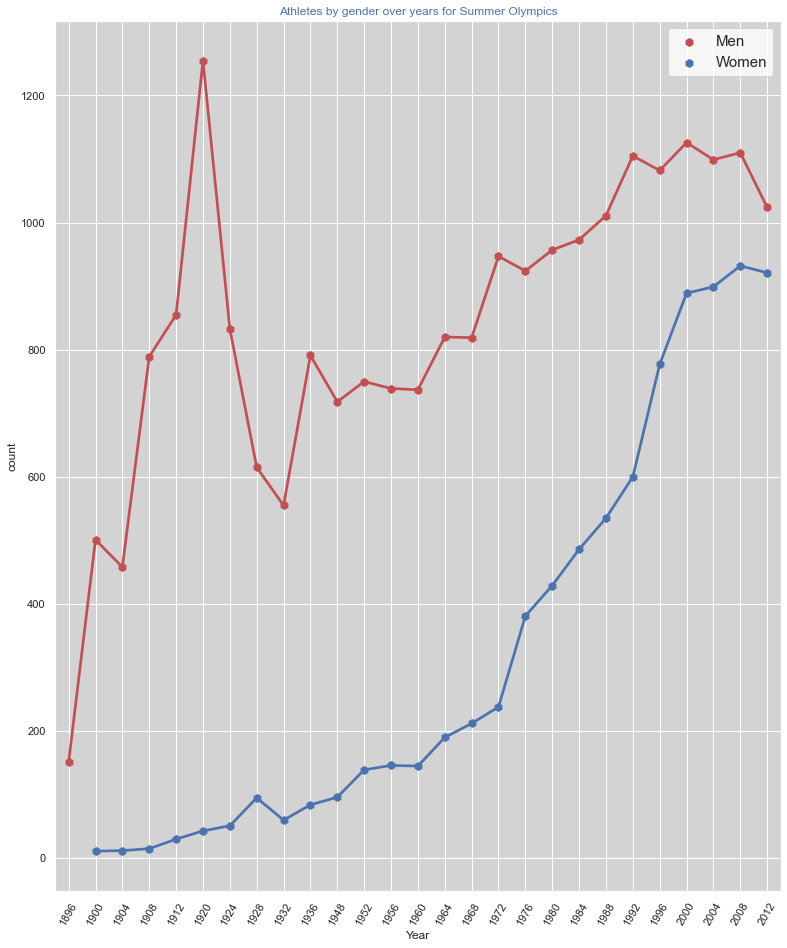

In [84]:
Men_v_Women = olympics_data.groupby(["Year","Gender"])["id"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
ax = sns.pointplot(x = Men_v_Women["Year"] , y = Men_v_Women["id"],
                   markers="h" , hue = Men_v_Women["Gender"],palette = ["r","b"])
sns.set_theme(style = 'whitegrid')
plt.grid(True)
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Athletes by gender over years for Summer Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})

### 9. Conclusion

* The distinct values of each columns in the olympics dataset are given below: 

|Columns|Distinct Values|
|-------|---------------|
|Year|27|
|City|22|
|Sport|43|
|Discipline|67|
|Athlete|22761|
|Country|147|
|Gender|2|
|Event|666|
|Medal|3|

* This dataset gives information about the olympics games held since **1896** to **2012** 


* **USA** has secured most number of medals(4586) and **24** countries viz. **BRN, GUA, BOT, TOG, MRI, CYP, SUD, GRN, ISV, UAE, ERI, MKD, BAR, AHO, IRQ, NIG, BER, TGA, GUY, CIV, BDI, SEN, DJI, GAB** have secured the least number of medals(1) across years collectively.


* Among 22 cities, **London** has hosted the olympics **thrice**, whereas **Athens, Los Angeles, Paris** hosted **twice** and rest **18** cities hosted only once.


* **India** started it's winning journey from **1900**. **Norman Pitchard** was the first athlete to get a medal for India in olympics. He won **silver** medal in **200m Athletics**.


* **India** won the first **gold** medal in **1928** for **Hockey**. India procured gold medals in hockey on years - **1928, 1932, 1936, 1948, 1952, 1956, 1964, 1980**, silver on **1960** and bronze on **1968**.


* **India** has managed to get total **183** medals in the olympics across years (But this includes the group games as well. Ex. Got a gold medal in Hockey in 1928 olympics but there were 15 players, so it meant 15 gold medals).


* The number of sports/events have increased from year to year. On **1896** there were only **9 sports**, but next olympics it rose to **14** and following years also saw the rising of number of sports.


* The level of participation also increased. The number of **cuntries participated in first olympics i.e.. 1896 were 11, and recent olympics(2012) had 85 countries involved**.


* Total number of medals won till date is **31160**. On **1896**, there were **151** whereas it rose to **1945** on **2012**. Out of **31160** medals, **10482 are Gold, 10309 are Silver and 10369 are Bronze**.


* Win ratio Men Vs Women -  22744 : 8416


* **Michael Phelps** with **18 Gold medals** is the most successful athlete in the history of olympics. Next **4** successful atheletes have managed to get **9 gold medals**.


* **USA has** gained(**2235**) the highest number of medals across years collectively. Top 10 countries are USA(2235), URS(838), GBR(546), ITA(476), GER(452), HUN(412), FRA(408), SWE(349), GDR(329), AUS(312).


* Among various sports, **Athletics** and **Aquatics** have more number of events.


* Overall Participation Level, Medal Won count increased with time and showing a healthy rising trends which means people are concious about gaming.

